# CS 598 Deep Learning for HealthCare - Final Project
***Team 41***

Indranil Guha| Iguha4@illinois.edu  
Snehangshu Bhattacharjee | sb8@illinois.edu





# Introduction

The paper can be found in this link: https://arxiv.org/abs/2108.03625


**Citation**

      @misc{
      hur2021unifying,
      title={Unifying Heterogenous Electronic Health Records Systems via Text-Based Code Embedding},
      author={Kyunghoon Hur and Jiyoung Lee and Jungwoo Oh and Wesley Price and Young-Hak Kim and Edward Choi},
      year={2021},
      eprint={2108.03625},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
      }

***Background of the problem***

Increased adoption of electronic health record (EHR) systems offers great potential for EHR-based predictive models to improve healthcare quality. But EHR data is heterogenous in nature and contemporary EHR data rely on data systems ranging from standardized codes e.g ICD9, LOINC etc. to free text entry. The commonly used “code based embedding” or CodeEmb approach used in different hospitals thus are not transferrable, and as a result predictive models couldn’t be trained on large EHR data collected from various hospitals or medical institutions due to its heterogenous format, so these predictive models can be used at scale in order to get its full effectiveness. This challenge can be addressed using common data model such as OMOP, FHIR (Rajko- mar et al., 2018), however this requires significant human effort and domain knowledge and different code systems used across the hospitals also may not always be mapped to a common model.

***Paper explanation***

In this paper, author suggested a code-agnostic text based representation learning called Description-Based Embedding or DescEmb. DescEmb adopts a Neural Text Encoder to convert the medical codes to a contextualized embedding which allows codes from different systems maps to the same text embedding space. As compare to code-based embedding, In this specific approach, instead of directly embedding the medical codes, a series of vector representation of code descriptions passed through the neural text encoder and this DescEmb makes it possible to train models on differently formatted EHR data interchangeably due to its code-agnostic nature.

The Text Encoder in DescEmb model can be any model that can generate a hidden state representation from a given description. The paper used two model architecture as a text encoder : Bi-Directional RNN and BERT. It also mentioned about pretraining the text-encoder using Masked Language Modeling (MLM). In the context of drug prescriptions, dosage or rate of Infusion can be useful to know the patient status. Value embedding is another innovative approach which is introduced here to capture the values along with the description added another effective feature for effective predictive outcome. Four different value embedding methods has been used such as – Value Aggregation (VA), Digit split value aggregation (DSVA), Digit Place embedding (DPE), and Value concatenated embedding (VC).

The code agnostic approach described in the paper proposes improvement in performance with Zero Shot and few shot transfer learning and pooled learning and thus it unifies heterogeneous code systems in healthcare predictive research.

Contributions of this specific approach to the predictive healthcare research:

1)	DescEmb achieves comparable or superior performance to CodeEmb on common clinical predictive tasks.

2)	Two differently structured EHR can be used to train and test predictive models interchangeably showing better performance than training on a single EHR data.

3)	No additional domain knowledge or manual effort needed to pool two differently structured EHR dataset into the embedding space.

4)	It opens the door for text based approach in predictive healthcare research.


#Scope of Reproducibility


In this project we will be experimenting on the below two hypothesis as a scope of reproducibility.

***Hypothesis 1***

We will Pretrain the embedding model "descemb_rnn" with MLM on MIMIC III database using bidirectional RNN architecture as porposed in the paper and will observe how the model is trained and will evaluate based on average loss by varying no of epoch and learning rate.

Then we will Pretrain the embedding model "codeemb" with W2V on same MIMIC III database and will observe how the model is trained and will observe if descemb_rnn shows improved average loss in comparison with the codeemb.

***Hypothesis 2***

We will preprocess MIMIC III data using the code present in the github repo mentioned in the paper for a predictive task "mortality" and using this preprocessed data we will train and validate the ehr_model first using descemb_rnn as the embedding model and RNN at the prediction layer with value embedding method "VA" and observe the average loss and precision of model, next we will be using the same preporcessed data to train and validate the ehr_model using "codemb" as the embedding model and RNN at the prediction layer and observe if the ehr_model with decemb as embedding model shows better perfromance. This will establish our experiment in single domain learning setting.

***Ablation***

We can see how value embedding is impacting the performance of a predictive task using a DescEmb model by training w/ and w/o value embedding method. Here we will train and validate the ehr_model using the same pre processed data as mentioned in hypothesis #2, decemb_rnn as embedding model, RNN at the prediction layer and ommit the value embedding method to see if the model performance with value embedding method as mentioned in hypothesis #2 is still better than the model w/o value embedding method.

***Note***

 Due to limitation of computing resource required to complete preprocessing and model traning we could not run this experiment with full MIMIC III database, instead we used the MIMIC III demo database for this experiment. Due to less number of sample data for training, we observed the model is overfitting which is undertstandable but we could still make some meaningful observation about the validatity in the claim made by the authors of the paper.

# Methodology

## Environment Setup

All required packages and libraries are present in the python 3 default colab runtime excpet below , run the code cell to install this. Refer to envioronment.yml file for more details about the requirement.

In [1]:
# Check and Install dependencies
!pip install iterative-stratification

## Source Code Setup



Existing code in the GitHub repo referenced in the paper will be used to run experiments on proposed hypothesis. https://github.com/hoon9405/DescEmb

Steps to setup your google drive:

1. Create a folder "Project" under Mydrive

1. Clone from the github https://github.com/guhaindranil83/DescEmb.git to make the local repo "descemb".

2. Upload the local repo "descemb" to "Project" folder.

4. Download the data and setup the directory for Input path as prescribed in the Data section below.


Mount google drive to the colab runtime.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data



### DATA Download Instruction

***Download the datasets from the MIMIC III Demo database for this experiment, the demo database is used to run this experirment as part of this project submission. Only MIMIC III Dataset is used for the scope of this project***

Johnson, A., Pollard, T., & Mark, R. (2019). MIMIC-III Clinical Database Demo (version 1.4). PhysioNet. https://doi.org/10.13026/C2HM2Q









### Data Descriptions and Statistics

MIMIC-III is a relational database consisting of 26 tables. For a detailed description of the database structure, see the MIMIC-III Clinical Database page.

More detail is provided on the RFC 4180 description page: https://tools.ietf.org/html/rfc4180


Working directory :  
/content/drive/MyDrive/Project/DescEmb/preprocess

Destination directory is set to :

/content/drive/MyDrive/Project/DescEmb/data_output_path

Data directory is set to :

/content/drive/MyDrive/Project/DescEmb/data_input_path/mimic

Stat :
* length of PATIENTS.csv  :  100
* length of ICUSTAYS.csv  :  136
* length of DIAGNOSIS_ICD.csv  :  136
* length of icus  : 72

***Note:***

 Headers in all csv file must be in CAPS for the preprocessing code to work, otherwise you will get key error when processing the input datasets.

***MIMIC III and eICU - Data Source used in the Paper***

Full Datasets can be downloaded from MIMIC III and eICU, filenames and data statistics are given in the below tables.

**MIMIC III**

Johnson, A., Pollard, T., & Mark, R. (2016). MIMIC-III Clinical Database (version 1.4). PhysioNet. https://doi.org/10.13026/C2XW26.

**eICU**

Pollard, T., Johnson, A., Raffa, J., Celi, L. A., Badawi, O., & Mark, R. (2019). eICU Collaborative Research Database (version 2.0). PhysioNet. https://doi.org/10.13026/C2WM1R



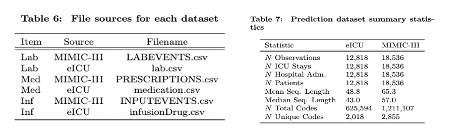

## Hypothesis#1 : Pretraining from Scratch



### Data Preprocessing Code and Command

***Preprocessing code***

Refer to DescEmb/Preprocess/preprocess_main.py


In [3]:
# First change the directory to preprocess folder
%cd /content/drive/MyDrive/Project/DescEmb/preprocess/

/content/drive/MyDrive/Project/DescEmb/preprocess


In [4]:
# Install necessary utility files
!python preprocess_utils.py

In [5]:
## use --data_type pretrain for Hypothesis #1
!python preprocess_main.py --src_data mimiciii --dataset_path /content/drive/MyDrive/Project/DescEmb/data_input_path/mimic --dest_path /content/drive/MyDrive/Project/DescEmb/data_output_path --data_type pretrain --target_task mortality

working directory .. :  /content/drive/MyDrive/Project/DescEmb/preprocess
create dest path.. /content/drive/MyDrive/Project/DescEmb/data_output_path
Destination directory is set to /content/drive/MyDrive/Project/DescEmb/data_output_path
Data directory is set to /content/drive/MyDrive/Project/DescEmb/data_input_path/mimic
length of PATIENTS.csv  :  100
length of ICUSTAYS.csv  :  136
length of DIAGNOSIS_ICD.csv  :  136
length of icus  : 72
readmission value counts : readmission
0              64
1               4
Name: count, dtype: int64
`ccs_multi_dx_tool_2015.csv` is not found so try to download from the internet.
--2024-05-03 21:16:58--  https://www.hcup-us.ahrq.gov/toolssoftware/ccs/Multi_Level_CCS_2015.zip
Resolving www.hcup-us.ahrq.gov (www.hcup-us.ahrq.gov)... 3.215.126.82, 3.209.251.159, 2600:1f18:6dc:c282:4f2:348d:467f:9e01, ...
Connecting to www.hcup-us.ahrq.gov (www.hcup-us.ahrq.gov)|3.215.126.82|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently

### Model




Author of this paper used two model architecture for text encoder Bi-RNN and BERT. Here we will pretrain the text encoder using Bi-RNN architecture on MIMIC III Database using MLM for the DescEmb model. Value encoding is set to 'NV' as it does not applicable for pretraining. For CodeEmb text encoder, standrad Word2Vec is used.

***Model Code***

* For descemb, refer to DescEmb/models/descemb.py (class RNNTextEncoder)

* For codeemb, refer to DescEmb/models/codeemb.py

### Training





***Training code***

* For descemb, refer to DescEmb/trainers/trainer.py (refer to class train)

* For codeemb, refer to DescEmb/trainers/word2vec_trainer.py (refer to class train)


***Hyperparams***

* lr is set to 0.001, we tried to run the pretraining with smaller lr 0.0001 but the pretraining time gets increased significanlty and we didn't observe any meaningful impromevement, so we kept the lr as .001 for this script.

* n_epochs set to 50, at this epoch model is still not converging but we kept it at 50 for reasonable runtime. Results with n_epoch = 500 is shown below for reference.

* Other model parameters are set to default, refer to
main.py for more details about deafult params setting.

   * --ratio : 100 (used 100% of data for the training due to limited availibility in demo database)
   * --batch_size : 128
   * --enc_embed_dim : 128
   * --enc_hidden_dim : 256
   * --mlm_prob : 0.3

***Computational requirements***

We couldn't complete the preprocessing and pretraining with full MIMIC III database using Colab Pro with 100 compute unit assigned, so we couldn't remark on actual computation requirement for this experiement when using full dataset. For this experiment we used MIMIC III demo databse and with this we could finish the pre training with 500 epoch and LR .001 within 10 minute with T4 15 GB GPU RAM.



In [6]:
%cd /content/drive/MyDrive/Project/DescEmb/

/content/drive/MyDrive/Project/DescEmb


**Pre-train a DescEmb model with Masked Language Modeling (MLM)**

In [ ]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path --model descemb_rnn --src_data mimiciii --ratio 100 --n_epochs 50 --lr .001 --value_mode NV --task mlm
# input_path must be preproces destination path
# n_epochs 50

In [7]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path --model descemb_rnn --src_data mimiciii --ratio 100 --n_epochs 500 --lr .001 --value_mode NV --task mlm
# input_path must be preproces destination path
# n_epochs 500

2024-05-03 21:18:46 | INFO numexpr.utils NumExpr defaulting to 2 threads.)))
[2024-05-03 21:18:51,910][trainers.trainer][INFO] - {'batch_size': 128,
 'bert_model': 'bert_tiny',
 'device_ids': [0],
 'disable_validation': False,
 'distributed_world_size': 1,
 'dropout': 0.3,
 'embed_model': None,
 'enc_embed_dim': 128,
 'enc_hidden_dim': 256,
 'eval_data': None,
 'fold': None,
 'init_bert_params': False,
 'init_bert_params_with_freeze': False,
 'input_path': '/content/drive/MyDrive/Project/DescEmb/data_output_path',
 'load_pretrained_weights': False,
 'lr': 0.001,
 'max_event_len': 150,
 'mlm_prob': 0.3,
 'model': 'descemb_rnn',
 'model_path': None,
 'n_epochs': 500,
 'patience': 5,
 'pred_embed_dim': 128,
 'pred_hidden_dim': 256,
 'pred_model': None,
 'ratio': '100',
 'rnn_layer': 1,
 'save_dir': 'checkpoints',
 'save_prefix': 'checkpoint',
 'seed': 1,
 'src_data': 'mimiciii',
 'task': 'mlm',
 'transfer': False,
 'valid_subsets': [],
 'value_mode': 'NV'}
/usr/local/lib/python3.10/dist-p

**Pre-train a CodeEmb model with Word2Vec**

In [ ]:
#!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path/mlm --model codeemb --src_data mimiciii --ratio 100 --n_epochs 50 --task w2v
# input_path must be preproces destination path
# n_epochs 50

In [10]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path/mlm --model codeemb --src_data mimiciii --ratio 100 --n_epochs 500 --task w2v
# input_path must be preproces destination path
# n_epochs 500

2024-05-03 21:50:24 | INFO numexpr.utils NumExpr defaulting to 2 threads.)))
[2024-05-03 21:50:28,329][trainers.word2vec_trainer][INFO] - epoch: 0, loss: 1.386
[2024-05-03 21:50:28,330][trainers.word2vec_trainer][INFO] - Saving checkpoint to checkpoints/checkpoint_best.pt
[2024-05-03 21:50:28,338][trainers.word2vec_trainer][INFO] - Finished saving checkpoint to checkpoints/checkpoint_best.pt
[2024-05-03 21:50:28,367][trainers.word2vec_trainer][INFO] - epoch: 1, loss: 1.386
Validation AUROC increased (0.000000 --> -1.386030)
[2024-05-03 21:50:28,367][trainers.word2vec_trainer][INFO] - Saving checkpoint to checkpoints/checkpoint_best.pt
[2024-05-03 21:50:28,373][trainers.word2vec_trainer][INFO] - Finished saving checkpoint to checkpoints/checkpoint_best.pt
[2024-05-03 21:50:28,402][trainers.word2vec_trainer][INFO] - epoch: 2, loss: 1.386
Validation AUROC increased (-1.386030 --> -1.385760)
[2024-05-03 21:50:28,403][trainers.word2vec_trainer][INFO] - Saving checkpoint to checkpoints/check

### Evaluation

Cross entropy loss is calculated for pretraining the models for both MLM and W2V task setting.

Average loss will be compared to see the pretraining performance of CodeEmb vs DescEmb to validate the hypothesis.

***Evaluation Code***

* For descemb, refer to DescEmb/trainers/trainer.py (refer to class train)

* For codeemb, refer to DescEmb/trainers/word2vec_trainer.py (refer to class train)



### Results

***Pre-train a DescEmb model with Masked Language Modeling (MLM)***

* Model still showing training loss oscilating between 0.4 and 0.3 as we increasing the no of epochs higher than 300, with n_epochs = 500 we observed average training loss is 0.448

***Pre-train a CodeEmb model with Word2Vec***

* Model converges at n_epochs = 393 with average training loss 0.332

so, in this experiment, we can not say the description embedding model pretraining shows better performance than a standard word2vec embedding model based on the average training loss with lr = .001. But here we need remember the dataset used for training is a smaller subset and also we could not lower the leraning rate than .001 inorder to complete this step with the given limited computing resource. Size of training data is defenetely a key factor when we pretrain a model from scratch.

## Hypothesis#2/Ablation : Single Domain Learning



### Data Preprocessing Code and Command
Preprocessing needs to be done for predictive learning without data_type "Pretraining" argument.

***Preprocessing code***

Refer to DescEmb/Preprocess/preprocess_main.py

In [11]:
%cd /content/drive/MyDrive/Project/DescEmb/preprocess/

/content/drive/MyDrive/Project/DescEmb/preprocess


In [12]:
## --data_type pretrain removed for pre proessing data for predictive tasks
!python preprocess_main.py --src_data mimiciii --dataset_path /content/drive/MyDrive/Project/DescEmb/data_input_path/mimic --dest_path /content/drive/MyDrive/Project/DescEmb/data_output_path

working directory .. :  /content/drive/MyDrive/Project/DescEmb/preprocess
Destination directory is set to /content/drive/MyDrive/Project/DescEmb/data_output_path
Data directory is set to /content/drive/MyDrive/Project/DescEmb/data_input_path/mimic
length of PATIENTS.csv  :  100
length of ICUSTAYS.csv  :  136
length of DIAGNOSIS_ICD.csv  :  136
length of icus  : 72
readmission value counts : readmission
0              64
1               4
Name: count, dtype: int64
`ccs_multi_dx_tool_2015.csv` is not found so try to download from the internet.
--2024-05-03 21:57:37--  https://www.hcup-us.ahrq.gov/toolssoftware/ccs/Multi_Level_CCS_2015.zip
Resolving www.hcup-us.ahrq.gov (www.hcup-us.ahrq.gov)... 3.209.251.159, 3.215.126.82, 2600:1f18:6dc:c283:ffaa:e083:6e2f:b4f6, ...
Connecting to www.hcup-us.ahrq.gov (www.hcup-us.ahrq.gov)|3.209.251.159|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://hcup-us.ahrq.gov:443/toolssoftware/ccs/Multi_Level_CCS

### Model



As proposed in the paper, ehr_model has two layer - embedding layer which can produce the hidden representation from a given description using neural text encoder and then at the prediction layer RNN model architecture is used to predict many to many or many to one prediction from the output of embedding layer.

In single domain learning setting, we used MIMIC III demo database for training and validation of the model first with DescEmb as the embedding model and then CodeEmb as embedding model. For evaluation,  we compared the average training loss, average precision score to observe which model perform better.

DescEmb embedding model is built as Bi-RNN textencoder and CodeEmb embedding model is built using standrad Word2Vec model architecture.

This experient is run for a predictive task "mortality".

Also, we used Value embedding mode "VA" and "NV" for DescEmb embedding model training to see how the value embedding impacts the performance as mentioned in the "**Ablation**" scope of this document.

***Model Code***

refer to DescEmb/models/ehr_model.py


### Training





***Training Code***

* For descemb, refer to DescEmb/trainers/trainer.py (refer to class train and class validate)

* For codeemb, refer to DescEmb/trainers/word2vec_trainer.py (refer to class train)


***Hyperparameter settings***

We tried to observe results by changing learning rate and n_epochs.

* Due to challange in computation resource we have produced the results with lr .001

* n_epochs = 10. Due to smaller size of demo data, the model stopped at lower epochs as the precision didn't change much with multiple epochs. however, we could observe descemb performs better than codeemb.

* Other model parameters are set to default, refer to
main.py for more details about deafult params setting.

   * --batch_size : 128
   * --enc_embed_dim : 128
   * --enc_hidden_dim : 256
   * --rnn_layer : 1
   * --dropout : 0.3
   * --pred_embed_dim : 128
   * --pred_hidden_dim : 256
   * --max_event_len : 150
   * --task : mortality

***Computational requirements***

We couldn't complete the training/validation with full MIMIC III dataset using Colab Pro with 100 compute unit assigned, so we couldn't remark on actual computation requirement for this experiement when using full dataset.

For this experiment we used MIMIC III demo databse and with this we could finish the training using the T4 15 GB GPU RAM.

In [13]:
%cd /content/drive/MyDrive/Project/DescEmb/

/content/drive/MyDrive/Project/DescEmb


***Train the ehr_model with DescEmb_rnn as embedding model, RNN at the prediction layer, and task "mortality" and value_mode "VA"***

In [14]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path --model ehr_model --embed_model descemb_rnn --pred_model rnn --src_data mimiciii --ratio 100 --n_epochs 10 --value_mode VA --task mortality
# input_path must be preproces destination path
# Here VA (Value Aggregation) is selected as value embedding

2024-05-03 21:58:27 | INFO numexpr.utils NumExpr defaulting to 2 threads.)))
[2024-05-03 21:58:28,244][trainers.trainer][INFO] - {'batch_size': 128,
 'bert_model': 'bert_tiny',
 'device_ids': [0],
 'disable_validation': False,
 'distributed_world_size': 1,
 'dropout': 0.3,
 'embed_model': 'descemb_rnn',
 'enc_embed_dim': 128,
 'enc_hidden_dim': 256,
 'eval_data': None,
 'fold': None,
 'init_bert_params': False,
 'init_bert_params_with_freeze': False,
 'input_path': '/content/drive/MyDrive/Project/DescEmb/data_output_path',
 'load_pretrained_weights': False,
 'lr': 0.0001,
 'max_event_len': 150,
 'mlm_prob': 0.3,
 'model': 'ehr_model',
 'model_path': None,
 'n_epochs': 10,
 'patience': 5,
 'pred_embed_dim': 128,
 'pred_hidden_dim': 256,
 'pred_model': 'rnn',
 'ratio': '100',
 'rnn_layer': 1,
 'save_dir': 'checkpoints',
 'save_prefix': 'checkpoint',
 'seed': 1,
 'src_data': 'mimiciii',
 'task': 'mortality',
 'transfer': False,
 'valid_subsets': ['valid', 'test'],
 'value_mode': 'VA'}
/us

***Train the ehr_model with CodeEmb as embedding model, RNN at the prediction layer, and task "mortality"***

In [15]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path --model ehr_model --embed_model codeemb --pred_model rnn --src_data mimiciii --n_epochs 10 --ratio 100 --task mortality
# input_path must be preproces destination path

2024-05-03 21:59:03 | INFO numexpr.utils NumExpr defaulting to 2 threads.)))
[2024-05-03 21:59:04,806][trainers.trainer][INFO] - {'batch_size': 128,
 'bert_model': 'bert_tiny',
 'device_ids': [0],
 'disable_validation': False,
 'distributed_world_size': 1,
 'dropout': 0.3,
 'embed_model': 'codeemb',
 'enc_embed_dim': 128,
 'enc_hidden_dim': 256,
 'eval_data': None,
 'fold': None,
 'init_bert_params': False,
 'init_bert_params_with_freeze': False,
 'input_path': '/content/drive/MyDrive/Project/DescEmb/data_output_path',
 'load_pretrained_weights': False,
 'lr': 0.0001,
 'max_event_len': 150,
 'mlm_prob': 0.3,
 'model': 'ehr_model',
 'model_path': None,
 'n_epochs': 10,
 'patience': 5,
 'pred_embed_dim': 128,
 'pred_hidden_dim': 256,
 'pred_model': 'rnn',
 'ratio': '100',
 'rnn_layer': 1,
 'save_dir': 'checkpoints',
 'save_prefix': 'checkpoint',
 'seed': 1,
 'src_data': 'mimiciii',
 'task': 'mortality',
 'transfer': False,
 'valid_subsets': ['valid', 'test'],
 'value_mode': 'NV'}
/usr/lo

***Train the ehr_model with DescEmb_rnn as embedding model, RNN at the prediction layer, and task "mortality" and value_mode "NV"***

In [17]:
!python main.py --distributed_world_size 1 --input_path /content/drive/MyDrive/Project/DescEmb/data_output_path --model ehr_model --embed_model descemb_rnn --pred_model rnn --src_data mimiciii --ratio 100 --n_epochs 10 --value_mode NV --task mortality
# input_path must be preproces destination path
# Here NV (No Value) is selected as value embedding - for Ablation

2024-05-03 22:00:50 | INFO numexpr.utils NumExpr defaulting to 2 threads.)))
[2024-05-03 22:00:51,294][trainers.trainer][INFO] - {'batch_size': 128,
 'bert_model': 'bert_tiny',
 'device_ids': [0],
 'disable_validation': False,
 'distributed_world_size': 1,
 'dropout': 0.3,
 'embed_model': 'descemb_rnn',
 'enc_embed_dim': 128,
 'enc_hidden_dim': 256,
 'eval_data': None,
 'fold': None,
 'init_bert_params': False,
 'init_bert_params_with_freeze': False,
 'input_path': '/content/drive/MyDrive/Project/DescEmb/data_output_path',
 'load_pretrained_weights': False,
 'lr': 0.0001,
 'max_event_len': 150,
 'mlm_prob': 0.3,
 'model': 'ehr_model',
 'model_path': None,
 'n_epochs': 10,
 'patience': 5,
 'pred_embed_dim': 128,
 'pred_hidden_dim': 256,
 'pred_model': 'rnn',
 'ratio': '100',
 'rnn_layer': 1,
 'save_dir': 'checkpoints',
 'save_prefix': 'checkpoint',
 'seed': 1,
 'src_data': 'mimiciii',
 'task': 'mortality',
 'transfer': False,
 'valid_subsets': ['valid', 'test'],
 'value_mode': 'NV'}
/us

### Evaluation

average Loss and average precision score are compared to see the performance of ehrmodel with CodeEmb and DescEmb as the embedding model to validate this hypothesis.

***For ablations,***
average Loss and average precision score will be compared to see the impact of value embedding for ehrmodel using DescEmb as the embedding model in comparison to the same model without value embedding.



***Evaluation Code***

* For descemb, refer to DescEmb/trainers/trainer.py (refer to class train)

* For codeemb, refer to DescEmb/trainers/word2vec_trainer.py (refer to class train)



### Results

***Train the ehr_model with DescEmb_rnn as embedding model, RNN at the prediction layer, and task "mortality" and value_mode "VA"***

* Average Loss : 1.358
* Average Precision Score : 0.118

***Train the ehr_model with CodeEmb as embedding model, RNN at the prediction layer, and task "mortality"***


* Average Loss : 1.417
* Average Precision Score : 0.105

**Hypothesis#2 Results Discussion**

* Average loss in training the model with descemb as embedding model is lower than of the model with CodeEmb as embedding model.

* Average precision score shows higher in DescEmb than Code Emb in similar setting.

* Based the training loss and precision score in model prediction, we can see descemb model performs better than codeemb.

**Ablation Study**

When we used Value_Mode = 'VA' the model shows lesser training losss 1.358 in comparison with the same model with value Mode = 'NV' for loss at 1.367 while the average precsion score remains same at 0.118 which shows adding the value embedding along with description embedding can perform better in predictive task like "mortality".

# Discussion

* Obtaining enough computation resource such GPU Ram was challenging with Google Colab offering to run the experient with Full MIMIC III database which is 6 GB of uncompressed data. We tried to process the full dataset with Colab Pro subscription which got exhausted in 2 hrs of runtime and couldn't complete the preprocessing of data. Due to this we have chosen to run this experiemt with MIMIC III demo database which is a much smaller subset of data and obviously is not enough to train the model to conclude on our hypothesis with full confidence. But we certainly observed that descemb embedding model shows better performance than codeemb in terms of training loss and average precision metrics.

* We have understood the model architecture and novelty in this paper to use a text encoder and value embedding method to do a description based predictive model which is code agnostic and this opens door to unifying the heterogenous EHR data used in many hospitals and use that for more effective healthcare predictive learning which was otherwise not possible with the code embedding architecture.

* Other than difficulty we faced in obtaining enough computing resource, understanding the code present in the github repo without much documentation available was a complex analysis task that we had to perform to be able to compile this executable in comprehensive manner which will be useful for any future work regarding reproducibility of other claims in the paper.

* **Future plan** : As a next step we can rent a VM on any public cloud and configure with at least 80 GB of Ram and comparable storage and then run this executable with full MIMIC III database to validate our hypothesis with more confidence which was not possible to do as part of this project submission due to limited time and resource availability during this course. We can also train the model with eICU database and then experiment in the transfer learning setting to observe how the model perform in a predictive task.

# Public GitHub Repo

Github link to colab notebook: https://github.com/guhaindranil83/DescEmb.git

